<a href="https://colab.research.google.com/github/fauzanmuh/PCVK_UAS_CarPark/blob/master/PCVK_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## UAS PCVK

### Menggunakan dataset Car Park

### Anggota Kelompok :
* Muhammad Fauzan (1941720171)
* Riska Nur Safitri (1941720073)
* Nabila Kamilia (1941720158)



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import math
import os
from google.colab.patches import cv2_imshow

In [4]:
img_car = '/content/drive/MyDrive/PCVK/UAS/2012-11-09_06_56_32.jpg';
img = cv2.imread(img_car)
img2 = cv2.imread(img_car)
image_path = '/content/drive/MyDrive/PCVK/UAS/car_park'
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
car_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/UAS/carDetection.xml')
cars = car_cascade.detectMultiScale(gray, 1.3, 5)

In [5]:
def pic_multi(imgA,imgB):
  fig = plt.figure(figsize=(15, 15))
  rows = 2
  columns = 2
  fig.add_subplot(rows, columns, 1)
  plt.axis('off')
  plt.title("Original Image")
  plt.imshow(imgA[:,:,::-1])
  fig.add_subplot(rows, columns, 2)
  plt.axis('off')
  plt.title("Tested Image")
  plt.imshow(imgB[:,:,::-1])

2  Sedikit


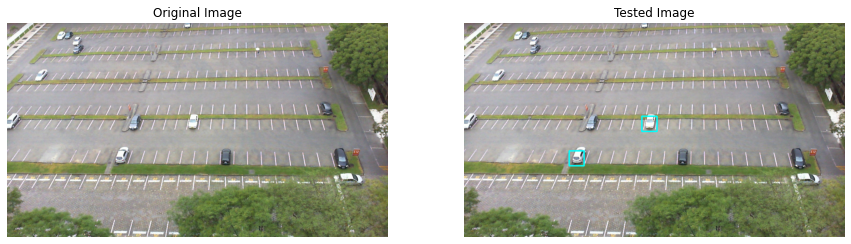

In [9]:
jumlah = 0;
for(x, y, w, h) in cars: 
  jumlah+=1;
  detected_car = img2[int(y):int(y + h), int(x):int(x + w)]
  cv2.imwrite("/content/drive/MyDrive/PCVK/UAS/car_park/car" + str(jumlah) + ".jpg",detected_car)
  cv2.rectangle(img,(x, y),(x + w, y + h),(255, 255, 0), 2)

pic_multi(img2, img)

if jumlah < 20:
  print(jumlah," Sedikit")
elif jumlah >= 20 and jumlah < 50:
  print(jumlah," Sedang")
else:
  print(jumlah," Banyak")

Number of white pixels: 3414
Number of black pixels: 8091
Tingkat Keramaian: 
Sangat Ramai
Accurate percentage :  29.674054758800523 %


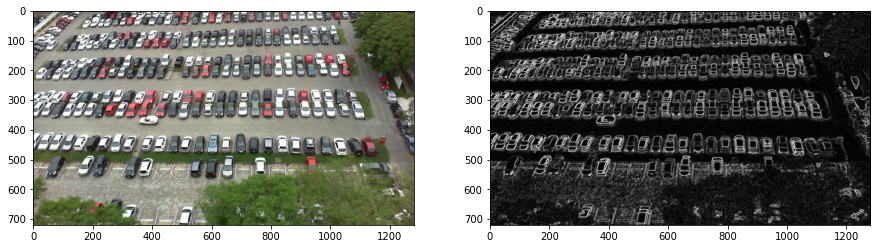

In [11]:
# Image Path
img3 = cv2.imread('/content/drive/MyDrive/PCVK/UAS/2012-10-25_09_33_23.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

# Removing noises
img = cv2.GaussianBlur(gray,(3, 3),0)

# Sobel edge detection
img_sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
img_sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

img_sobelxy = cv2.addWeighted(cv2.convertScaleAbs(img_sobelx), 0.5, cv2.convertScaleAbs(img_sobely), 0.5, 0)

f, axarr = plt. subplots(1, 2, figsize=(15, 5))
plt.subplot(121), plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
axarr[0].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(img_sobelxy, cmap = 'gray')

# Calculate white and black pixel
number_of_white_pix = np.sum(img_sobelxy == 255)
number_of_black_pix = np.sum(img_sobelxy == 0)
  
print('Number of white pixels:', number_of_white_pix)
print('Number of black pixels:', number_of_black_pix)

# Create Category by Data Range
print("Tingkat Keramaian: ")
if (number_of_white_pix > 3000):
    print("Sangat Ramai")
elif (number_of_white_pix >= 1000 and number_of_white_pix <= 2999):
    print("Ramai")
elif (number_of_white_pix >= 100 and number_of_white_pix <= 999):
    print("Kurang Ramai")
elif (number_of_white_pix < 100):
    print("Sepi")

threshold = (number_of_white_pix / (number_of_white_pix + number_of_black_pix)) * 100

print("Accurate percentage : ", threshold, "%")